In [0]:
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt
tf.enable_eager_execution()

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/'
'''
from google.colab import files
uploaded = files.upload()
file = 'shakespeare_input.txt'
'''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


"\nfrom google.colab import files\nuploaded = files.upload()\nfile = 'shakespeare_input.txt'\n"

In [0]:
#opening file and reading data and making char2id,id2char dictionaries
filepath='/content/gdrive/My Drive/Colab Notebooks/shakespeare_input.txt'
text = open(filepath, 'rb').read().decode(encoding='utf-8')
dictionary = sorted(set(text))
char2idx = {u:i for i, u in enumerate(dictionary)}
idx2char = np.array(dictionary)
text= np.array([char2idx[c] for c in text])

In [0]:
def split_input_target(c):
    '''
    This function splits a given sequence into input and
    output characters.
    '''
    input_text = c[:-1]
    target_text = c[1:]
    return input_text, target_text
  
seq_length=100
char_dataset = tf.data.Dataset.from_tensor_slices(text)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

dataset = sequences.map(split_input_target)
dataset = dataset.shuffle(10000).batch(64, drop_remainder=True)

In [33]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  '''
  This function builds a lstm model, with first layers as
  embedding. Second as lstm and then a dense layer with
  dictionary size output.
  '''
  model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
  tf.keras.layers.LSTM(rnn_units,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'),
  tf.keras.layers.Dense(vocab_size)])
  return model

model = build_model(vocab_size = len(dictionary),embedding_dim=256,rnn_units=512,batch_size=64)

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (64, None, 256)           17152     
_________________________________________________________________
lstm_11 (LSTM)               (64, None, 512)           1574912   
_________________________________________________________________
dense_11 (Dense)             (64, None, 67)            34371     
Total params: 1,626,435
Trainable params: 1,626,435
Non-trainable params: 0
_________________________________________________________________


In [0]:
def loss(labels, logits):
  
  '''
  This function returns the cross entropy loss.
  '''
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

adam = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False, clipnorm = 5)
model.compile(optimizer='adam', loss=loss)
checkpoint_dir = '/content/gdrive/My Drive/Colab Notebooks/Checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,save_weights_only=True)

Epoch 1/15


W0703 11:12:36.211042 140704702592896 util.py:244] Unresolved object in checkpoint: (root).optimizer
W0703 11:12:36.212492 140704702592896 util.py:244] Unresolved object in checkpoint: (root).optimizer.iter
W0703 11:12:36.213868 140704702592896 util.py:244] Unresolved object in checkpoint: (root).optimizer.beta_1
W0703 11:12:36.218329 140704702592896 util.py:244] Unresolved object in checkpoint: (root).optimizer.beta_2
W0703 11:12:36.220155 140704702592896 util.py:244] Unresolved object in checkpoint: (root).optimizer.decay
W0703 11:12:36.222227 140704702592896 util.py:244] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0703 11:12:36.223495 140704702592896 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.embeddings
W0703 11:12:36.224541 140704702592896 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-2.kernel
W0703 11:12:36.226265 140704702592896 util.py:2

64/64 [==============================] - 40s 624ms/step - loss: 3.2337
Epoch 2/15
64/64 [==============================] - 36s 563ms/step - loss: 2.4439
Epoch 3/15
64/64 [==============================] - 36s 559ms/step - loss: 2.2075
Epoch 4/15
64/64 [==============================] - 35s 554ms/step - loss: 2.0783
Epoch 5/15
64/64 [==============================] - 35s 552ms/step - loss: 1.9769
Epoch 6/15
64/64 [==============================] - 35s 547ms/step - loss: 1.9123
Epoch 7/15
64/64 [==============================] - 35s 553ms/step - loss: 1.8469
Epoch 8/15
64/64 [==============================] - 35s 551ms/step - loss: 1.7937
Epoch 9/15
64/64 [==============================] - 35s 546ms/step - loss: 1.7485
Epoch 10/15
64/64 [==============================] - 35s 542ms/step - loss: 1.7001
Epoch 11/15
64/64 [==============================] - 35s 548ms/step - loss: 1.6666
Epoch 12/15
 3/64 [>.............................] - ETA: 32s - loss: 1.6706

W0703 11:19:07.526247 140704702592896 training_generator.py:235] Your dataset ran out of data; interrupting training. Make sure that your dataset can generate at least `steps_per_epoch * epochs` batches (in this case, 960 batches). You may need to use the repeat() function when building your dataset.


 3/64 [>.............................] - ETA: 35s - loss: 1.6706

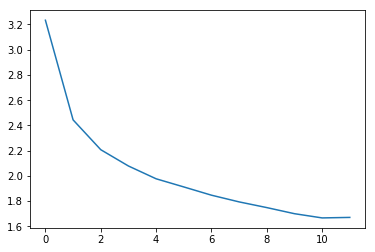

In [35]:
#fitting the model and plotting loss curve
history = model.fit(dataset, epochs=15, steps_per_epoch=64, callbacks=[checkpoint_callback])
plt.plot(history.history['loss'])

In [43]:
def generate_text(model, start_string):
  '''
  This function generates a sequence of characters by taking
  a seed as the start string.
  '''
  num_generate = 1000
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)
  text_generated = []
  temperature = 1.0
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      predictions = tf.squeeze(predictions, 0)
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
      input_eval = tf.expand_dims([predicted_id], 0)
      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

tf.train.latest_checkpoint(checkpoint_dir)
model = build_model(vocab_size = len(dictionary),embedding_dim=256,rnn_units=512,batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))
print(generate_text(model, start_string=u"Gods poured thy thunder on the face of Earth. ")) 

Gods poured thy thunder on the face of Earth. I priece you,
Hat we come fellionous eyes godness adlibence.

BECDORW:
Let me:
Whonesomatt sutcho's a rine ecour all thee leave lang the
that t owd not thuse as Porcessaid,
With you hee, priff in this every what me,
World these trige thy dods Marnct five and at forse;
And ca hid Musing king.

SIMON:
Thou have servants me, Sirain?''ther some, that's nworth
deshembity a gidle rapurech's was confeik and in too was.

IANGO:
Thouselt's my wital.

Plown:
By devemnatant, then cout, and thinm, be
the Cure of than seef thy deat
Thou are one what it what if the best?

BASTHARCS:
Luty you knywere!
He linghow that your majagat to hever a fancest ploce
That a fear of him and given togthes:
A bread toogh: 'Wight thou
Eaqurious of Surid his miracion
Neces these they by your lipey of Vasish,
Look you, this weel up, our, whyselfous a
bears, co you arvent; I'll secus
As good me? evey of Mackleas! Ake them's gentle this ince:
I'll no hencefored me one of all 